# Application prédiction de l'obésité

Dans cette application on vous propose de générer un modèle de prédiction de l'obésité à partir d'un ensemble de caractéristique et informations de la personne. Vous utiliserez une méthode de classification supervisée que vous appliquerez sur un ensemble de données réelles : "ObesityDataSet.csv"
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# I- Connection à votre drive pour lecture des données:

Cette étape est nécessaire seulement si vous travailler sous Clobal. Si vous travailler avec un aure éditeur python sur votre machine, il suffit de placer le fichier "ObesityDataSet.csv" dans votre répertoire de travail.

1- Créer sur votre drive google un répertoire au nom "data" et importer dedans le fichier ObesityDataSet.csv

2- Créer une connection à votre drive en exécutant le code suivant:

```
from google.colab import drive
drive.mount(‘/content/drive’)
```
4- Suivre les étapes de connection et copier le lien envoyé.
Si vous avez de difficultés, vous pouvez visualiser cette vidéo: https://youtu.be/TDyfhlg23vs



In [63]:
#céer une connection avec google colab
#from google.colab import drive
#drive.mount('/content/drive')

# II- Importation des données dans un frame pandas :
Compléter le code suivant afin d’importer les données du fichier pima.csv et afficher les caractéristiques correspondantes.
1- Importer la librairie pandas

2- lire le fichier ObesityDataSet.csv (copier le chemin complet à partir de votre drive)

3- Afficher les dimensions de la table avec la propriété shape

4-afficher les colonnes et leurs types

In [64]:
#importer  la librairie Pandas
import pandas as pd
#lecture du fichier "ObesityDataSet.txt" avec la fonction read_csv de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
data = pd.read_csv("dataFlight_version_2.csv",index_col=0)
#afficher les 10 premières lignes avec data.head(10)
data

,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
Year,,,,,,,,,,,,,,,,,,,,,
2009,2,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",...,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0,671_AirTran Airways Corporation_2009-05-28
2013,2,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",...,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0,3297_Envoy Air - MQ_2013-06-29
2010,3,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",...,1979.0,8,0.0,0.0,0.0,0.0,0.0,Aug,0,1806_Delta Airlines_2010-08-31
2006,1,1,15,7,US Airways Inc.,Newark Liberty International Airport,"Newark, NJ",New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",...,529.0,3,0.0,0.0,0.0,0.0,32.0,Jan,1,465_US Airways Inc._2006-01-15
2006,3,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,"Boston, MA",Massachusetts,Cleveland Hopkins International Airport,"Cleveland, OH",...,563.0,3,0.0,0.0,0.0,0.0,0.0,Aug,1,1431_Continental Air Lines Inc._2006-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,4,12,27,3,Delta Airlines,Hartsfield-Jackson Atlanta International Airport,"Atlanta, GA",Georgia,San Antonio International Airport,"San Antonio, TX",...,874.0,4,0.0,0.0,0.0,0.0,0.0,Dec,0,1871_Delta Airlines_2017-12-27
2008,1,3,23,7,Southwest Airlines,McCarran International Airport,"Las Vegas, NV",Nevada,Phoenix Sky Harbor International Airport,"Phoenix, AZ",...,256.0,2,0.0,0.0,0.0,0.0,0.0,Mar,0,966_Southwest Airlines_2008-03-23
2003,4,11,14,5,US Airways Inc.,Charleston International Airport,"Charleston, SC",South Carolina,Charlotte Douglas International Airport,"Charlotte, NC",...,168.0,1,0.0,0.0,0.0,0.0,0.0,Nov,0,1457_US Airways Inc._2003-11-14


In [65]:
data = data.reset_index() # convertir l'index "Month" en colonne
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'Dest', 'DestCityName', 'DestStateName', 'CRSDepTime', 'DepDelay',
       'DepDelayMinutes', 'CRSArrTime', 'ArrDelay', 'ArrDelayMinutes',
       'Cancelled', 'Diverted', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'MONTH_AB', 'FLIGHT_STATUS', 'Unique_Flight_ID'],
      dtype='object')

In [66]:
data = data[['Month', 'DayofMonth','DayOfWeek','Reporting_Airline','Origin','OriginCityName','OriginStateName','Dest','DestCityName','DestStateName','ArrDelayMinutes']]
data.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,ArrDelayMinutes
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",Florida,0.0
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,0.0
2,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",Michigan,0.0
3,1,15,7,US Airways Inc.,Newark Liberty International Airport,"Newark, NJ",New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,32.0
4,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,"Boston, MA",Massachusetts,Cleveland Hopkins International Airport,"Cleveland, OH",Ohio,2.0


In [67]:
# Fonction pour déterminer la catégorie de retard en fonction de la valeur de ArrDelay
def categorize_arrdelay(arr_delay):
    if arr_delay <= 15:
        return 0
    elif 16 <= arr_delay <= 60:
        return 1
    else:
        return 2

# Appliquer la fonction de catégorisation à la colonne ArrDelay et créer la nouvelle colonne ArrDelayCategory
data['ArrDelayCategory'] = data['ArrDelayMinutes'].apply(categorize_arrdelay)

# Afficher les premières lignes du DataFrame avec la nouvelle colonne ArrDelayCategory
data.head(5).append(data.tail(5))

C:\Users\naitmaam\AppData\Local\Temp\ipykernel_37436\4225931862.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.head(5).append(data.tail(5))


,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,ArrDelayMinutes,ArrDelayCategory
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",Florida,0.0,0
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,0.0,0
2,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",Michigan,0.0,0
3,1,15,7,US Airways Inc.,Newark Liberty International Airport,"Newark, NJ",New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,32.0,1
4,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,"Boston, MA",Massachusetts,Cleveland Hopkins International Airport,"Cleveland, OH",Ohio,2.0,0
1164836,12,27,3,Delta Airlines,Hartsfield-Jackson Atlanta International Airport,"Atlanta, GA",Georgia,San Antonio International Airport,"San Antonio, TX",Texas,0.0,0
1164837,3,23,7,Southwest Airlines,McCarran International Airport,"Las Vegas, NV",Nevada,Phoenix Sky Harbor International Airport,"Phoenix, AZ",Arizona,0.0,0
1164838,11,14,5,US Airways Inc.,Charleston International Airport,"Charleston, SC",South Carolina,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,0.0,0
1164839,5,15,2,Southwest Airlines,Chicago Midway International Airport,"Chicago, IL",Illinois,Nashville International Airport,"Nashville, TN",Tennessee,0.0,0
1164840,4,29,2,United Airlines - UA,Washington Dulles International Airport,"Washington, DC",Virginia,Chicago O'Hare International Airport,"Chicago, IL",Illinois,0.0,0


In [68]:
# Compter le nombre de valeurs pour chaque catégorie de la colonne 'ArrDelayCategory'
value_counts = data['ArrDelayCategory'].value_counts()

# Afficher le nombre de valeurs pour chaque catégorie
print('Nombre de valeurs à 0 :', value_counts[0])
print('Nombre de valeurs à 1 :', value_counts[1])
print('Nombre de valeurs à 2 :', value_counts[2])

Nombre de valeurs à 0 : 947874
Nombre de valeurs à 1 : 150999
Nombre de valeurs à 2 : 65968


### Afficher les dimensions de la table des données (propriété shape)

In [69]:
data.shape

(1164841, 12)

### Afficher la liste des colonnes data.columns

In [70]:
data = data.reset_index() # convertir l'index "Month" en colonne
data.columns

Index(['index', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline',
       'Origin', 'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName',
       'DestStateName', 'ArrDelayMinutes', 'ArrDelayCategory'],
      dtype='object')

### Afficher la liste des colonnes et leurs types (propriété dtypes)

In [71]:
data.dtypes

index                  int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
Reporting_Airline     object
Origin                object
OriginCityName        object
OriginStateName       object
Dest                  object
DestCityName          object
DestStateName         object
ArrDelayMinutes      float64
ArrDelayCategory       int64
dtype: object

# III- Préparation des données d'apprentissage

## 1- Vérification des données
1. Vérifier s'il y a des valeurs non renseignées (nulles)
`print(data.isnull().sum())`
2. Afficher la description des données avec la fonction describe: `data.describe()`



In [72]:
#compter les valeurs nulles
print(data.isnull().sum())
#description des données
data.describe()


index                0
Month                0
DayofMonth           0
DayOfWeek            0
Reporting_Airline    0
Origin               0
OriginCityName       0
OriginStateName      0
Dest                 0
DestCityName         0
DestStateName        0
ArrDelayMinutes      0
ArrDelayCategory     0
dtype: int64


,index,Month,DayofMonth,DayOfWeek,ArrDelayMinutes,ArrDelayCategory
count,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06
mean,5.824200e+05,6.444342e+00,1.572636e+01,3.931258e+00,1.231862e+01,2.428958e-01
std,3.362608e+05,3.435304e+00,8.774359e+00,1.991238e+00,3.551927e+01,5.451265e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.912100e+05,3.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,5.824200e+05,6.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00,0.000000e+00
75%,8.736300e+05,9.000000e+00,2.300000e+01,6.000000e+00,9.000000e+00,0.000000e+00
max,1.164840e+06,1.200000e+01,3.100000e+01,7.000000e+00,1.898000e+03,2.000000e+00


In [73]:
data = data.drop("ArrDelayMinutes", axis=1)

In [74]:
data.describe()

,index,Month,DayofMonth,DayOfWeek,ArrDelayCategory
count,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06
mean,5.824200e+05,6.444342e+00,1.572636e+01,3.931258e+00,2.428958e-01
std,3.362608e+05,3.435304e+00,8.774359e+00,1.991238e+00,5.451265e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.912100e+05,3.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,5.824200e+05,6.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,8.736300e+05,9.000000e+00,2.300000e+01,6.000000e+00,0.000000e+00
max,1.164840e+06,1.200000e+01,3.100000e+01,7.000000e+00,2.000000e+00


## 2- Transformation des données
1. Transformer les données texte en utlisant `LabelEncoder`

2. Transformer les données booléennes en utilisant `LabelBinarizer`


In [75]:

from sklearn import preprocessing

Encoder1 =preprocessing.LabelEncoder()
#ou
Encoder2 = preprocessing.LabelBinarizer()


#Labellisation des champ textes avec Encoder1
data["Origin"]=Encoder1.fit_transform(data["Origin"])
data["OriginCityName"]=Encoder1.fit_transform(data["OriginCityName"])
data["OriginStateName"]=Encoder1.fit_transform(data["OriginStateName"])
data["DestCityName"]=Encoder1.fit_transform(data["DestCityName"])
data["DestStateName"]=Encoder1.fit_transform(data["DestStateName"])
data["Dest"]=Encoder1.fit_transform(data["Dest"])
data["Reporting_Airline"]=Encoder1.fit_transform(data["Reporting_Airline"])


#afficher les 10 premières lignes
data.head()

,index,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,ArrDelayCategory
0,0,5,28,4,1,122,223,51,258,262,8,0
1,1,6,29,6,10,130,127,5,77,84,43,0
2,2,8,31,2,8,199,205,4,89,91,21,0
3,3,1,15,7,24,241,247,29,55,61,32,1
4,4,8,7,1,7,33,39,20,66,70,34,0


### Afficher la liste des colonnes et leurs nouveaux types (propriété dtypes)

In [76]:
data.dtypes

index                int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
Reporting_Airline    int32
Origin               int32
OriginCityName       int32
OriginStateName      int32
Dest                 int32
DestCityName         int32
DestStateName        int32
ArrDelayCategory     int64
dtype: object

## 3- Séparation des données input(X)/output(Y)

 Transformer le tableau pandas en matrice Numpy (avec la fonction to_numpy) et séparer ensuite les données explicatives X (16 premières variables) et de la cible Y (dernière variable). Utiliser le slicing.

In [77]:
X = data[['Month', 'DayofMonth','DayOfWeek','Reporting_Airline','Origin','OriginCityName','OriginStateName','Dest','DestCityName','DestStateName']]

Y = data['ArrDelayCategory']

## 3- Découpage des données train/test

1. Découper  les données `x_nomalized` ou `x_scaled` en données train et test avec la fonction **train_test_split** du module **model_selection** de pandas. La taille de l’échantillon train est égale à 70% (paramètre test_size de la fonction `train_test_split`).
Effectuer ce découpage afin de créer (x_train, y_train) à partir de  `x_nomalized` ou `x_scaled`.

2. Afficher les structures des ensembles crées en utilisant la propriété  `shape` de chaque vecteur.

In [78]:
#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas
#importation du module model_selection de scikit learn
from sklearn.model_selection import train_test_split
#subdivision des données  éch.app = 70%

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
pd.DataFrame(X_train).head()


(931872, 10) (232969, 10) (931872,) (232969,)


,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName
550376,8,26,7,24,270,274,37,202,246,17
604135,4,9,4,11,65,70,34,41,49,47
1048089,7,23,4,22,75,83,43,224,223,43
299604,5,13,1,6,54,61,32,314,314,4
508181,7,7,4,19,64,68,16,54,58,40


# VII- Classification par les SVM
Comme quatrième approche de classification, nous utiliserons les SVM.

1-A partir du module `svm` du package sklearn, importer la classe `SVC`.

2- Créer une instance de la classe `SVC` de `sklearn.svm`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre quatrième modèle prédictif que vous appellerez « svm_model ».  Pour ce faire, il faut exécuter la fonction fit de la classe SVC.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

In [79]:
#importer la classe SVC
from sklearn.svm import LinearSVC
 #instanciation de l’objet svm_model
svm_model=LinearSVC()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf

print(svm_model)
#exécution de l'instance sur les données d'apprentissage
svm_model.fit(X_train, y_train)


#appliquer le modèle sur les données test
y_pred_svm = svm_model.predict(X_test)
#création et affichage de la matrice de confusion

#Importer le module metric
from sklearn import metrics

model_score_svm=metrics.accuracy_score(y_test, y_pred_svm)
#Affichier les scores. Que remarquez vous?
print(model_score_svm)



LinearSVC()
0.8129922865273921


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Matrice de confusion SVM

<AxesSubplot: >

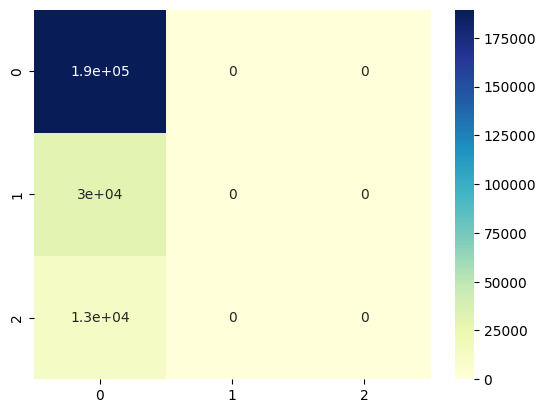

In [80]:
# Importer le module seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Afficher la matrice de confusion à l'aide de heatmap de seaborn
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="YlGnBu")

## Application de la méthode StandardScalar()

In [81]:
x_normalized=preprocessing.StandardScaler().fit_transform(X)

## Découpage après scaling méthide StandardScalar()

In [82]:
X_train_op1, X_test_op1, y_train_op1, y_test_op1 = train_test_split(x_normalized, Y, test_size=0.2, random_state=42)

print(X_train_op1.shape, X_test_op1.shape, y_train_op1.shape, y_test_op1.shape)
pd.DataFrame(X_train_op1).head()

(931872, 10) (232969, 10) (931872,) (232969,)


,0,1,2,3,4,5,6,7,8,9
0,0.452844,1.170871,1.541123,1.230328,0.874791,0.880899,0.943429,0.195482,0.611262,-0.332621
1,-0.711536,-0.766594,0.034522,-0.541669,-1.115963,-0.985341,0.751662,-1.357688,-1.177204,1.585158
2,0.161749,0.828965,0.034522,0.957713,-1.018853,-0.866414,1.326962,0.407716,0.402457,1.329454
3,-0.420441,-0.310720,-1.472079,-1.223206,-1.222784,-1.067675,0.623818,1.275948,1.228601,-1.163659
4,0.161749,-0.994531,0.034522,0.548790,-1.125674,-1.003637,-0.398938,-1.232277,-1.095497,1.137676


# SVM (avec méthode StandardScalar)

In [83]:
 #instanciation de l’objet svm_model
svm_model=LinearSVC()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf

print(svm_model)
#exécution de l'instance sur les données d'apprentissage
svm_model.fit(X_train_op1, y_train_op1)


#appliquer le modèle sur les données test
y_pred_svm1 = svm_model.predict(X_test_op1)
#création et affichage de la matrice de confusion

model_score_svm1=metrics.accuracy_score(y_test_op1, y_pred_svm1)
#Affichier les scores. Que remarquez vous?
print(model_score_svm1)

LinearSVC()
0.8129922865273921


# RandomForest (avec méthode StandardScalar)

In [84]:
from sklearn.ensemble import RandomForestClassifier
 #instanciation de l’objet 
rf_model=RandomForestClassifier()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf

print(rf_model)
#exécution de l'instance sur les données d'apprentissage
rf_model.fit(X_train_op1, y_train_op1)

# Use the predict method to get the predicted values for the test data
y_pred_rf1 = rf_model.predict(X_test_op1)

# Calculate the accuracy score using metrics.accuracy_score and print it
model_score_rf1 = metrics.accuracy_score(y_test_op1, y_pred_rf1)
print(model_score_rf1)

RandomForestClassifier()
0.7890019702192137


### Dans cette partie, nous allons explorer une méthode de préparation de données en utilisant MinMaxScaler pour essayer d'optimiser les résultats de nos modèles de classification. En outre, nous allons tester le modèle Random Forest pour évaluer ses performances par rapport aux autres modèles précédemment utilisés.

## Application de la méthode MinMAXScaler

In [85]:
x_scaled=preprocessing.MinMaxScaler().fit_transform(X)

## Découpage après applicaion de la méthode MinMaxScaler

In [86]:
X_train_op2, X_test_op2, y_train_op2, y_test_op2 = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

print(X_train_op1.shape, X_test_op2.shape, y_train_op2.shape, y_test_op2.shape)
pd.DataFrame(X_train_op2).head()

(931872, 10) (232969, 10) (931872,) (232969,)


,0,1,2,3,4,5,6,7,8,9
0,0.636364,0.833333,1.0,0.923077,0.688776,0.713542,0.711538,0.511392,0.635659,0.326923
1,0.272727,0.266667,0.5,0.423077,0.165816,0.182292,0.653846,0.103797,0.126615,0.903846
2,0.545455,0.733333,0.5,0.846154,0.191327,0.216146,0.826923,0.567089,0.576227,0.826923
3,0.363636,0.400000,0.0,0.230769,0.137755,0.158854,0.615385,0.794937,0.811370,0.076923
4,0.545455,0.200000,0.5,0.730769,0.163265,0.177083,0.307692,0.136709,0.149871,0.769231


# SVM (avec méthode MinMaxScalar)

In [87]:
 #instanciation de l’objet svm_model
svm_model2=LinearSVC()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf

print(svm_model2)
#exécution de l'instance sur les données d'apprentissage
svm_model2.fit(X_train_op2, y_train_op2)


#appliquer le modèle sur les données test
y_pred_svm2 = svm_model2.predict(X_test_op2)
#création et affichage de la matrice de confusion

model_score_svm2=metrics.accuracy_score(y_test_op2, y_pred_svm2)
#Affichier les scores. Que remarquez vous?
print(model_score_svm2)

LinearSVC()
0.8129922865273921


# RandomForest (avec méthode MinMaxScalar)

In [88]:

 #instanciation de l’objet 
rf_model2=RandomForestClassifier()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf


#exécution de l'instance sur les données d'apprentissage
rf_model2.fit(X_train_op2, y_train_op2)

# Use the predict method to get the predicted values for the test data
y_pred_rf2 = rf_model2.predict(X_test_op2)

# Calculate the accuracy score using metrics.accuracy_score and print it
model_score_rf2 = metrics.accuracy_score(y_test_op2, y_pred_rf2)
print(model_score_rf2)

0.7892681000476458


In [89]:
from sklearn.linear_model import LinearRegression

# Instancier un objet LinearRegression
lin_model = LinearRegression()

# Exécuter l'instance sur les données d'apprentissage
lin_model.fit(X_train_op2, y_train_op2)

# Utiliser la méthode predict pour obtenir les valeurs prédites pour les données de test
y_pred_lin = lin_model.predict(X_test_op2)

# Calculer le score de précision en utilisant metrics.accuracy_score et l'afficher
model_score_lin = lin_model.score(X_test_op2, y_test_op2)
print(model_score_lin)


0.0005871165786692778


# VIII- Validation des modèles

1. Calculer les scores TPR et FPR de chaque modèle généré et les ajouter dans des listes

2. Afficher chaque score avec une courbe ou histogramme

Comparer les résultats

In [90]:
#Importer le module metric
from sklearn import metrics
#Importer le Pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#Calculer les scores des modèles
lr_model_score_svm=metrics.accuracy_score(y_test, y_pred_svm)


lr_model_score_svm1=metrics.accuracy_score(y_test_op1, y_pred_svm1)


lr_model_score_svm2=metrics.accuracy_score(y_test_op2, y_pred_svm2)

lr_model_score_rf1=metrics.accuracy_score(y_test_op1, y_pred_rf1)
lr_model_score_rf2=metrics.accuracy_score(y_test_op2, y_pred_rf2)


print("score SVM : ",lr_model_score_svm)


print("score SVM méthode StandardScalar : ",lr_model_score_svm1)


print("score SVM  méthode MINMAXScalar: ",lr_model_score_svm2)


print("score randomForest méthode StandardScalar:",lr_model_score_rf1)
print("score randomForest  méthode MINMAXScalar: ",lr_model_score_rf2)

score SVM :  0.8129922865273921
score SVM méthode StandardScalar :  0.8129922865273921
score SVM  méthode MINMAXScalar:  0.8129922865273921
score randomForest méthode StandardScalar: 0.7890019702192137
score randomForest  méthode MINMAXScalar:  0.7892681000476458


In [95]:
from sklearn.metrics import  classification_report

report = classification_report(y_test_op2, y_pred_rf2) 
print("\nRapport de classification:\n", report) 


Rapport de classification:
               precision    recall  f1-score   support

           0       0.82      0.96      0.88    189402
           1       0.17      0.04      0.06     30315
           2       0.10      0.02      0.03     13252

    accuracy                           0.79    232969
   macro avg       0.36      0.34      0.33    232969
weighted avg       0.69      0.79      0.73    232969



# Matrice de confusion des modèles 

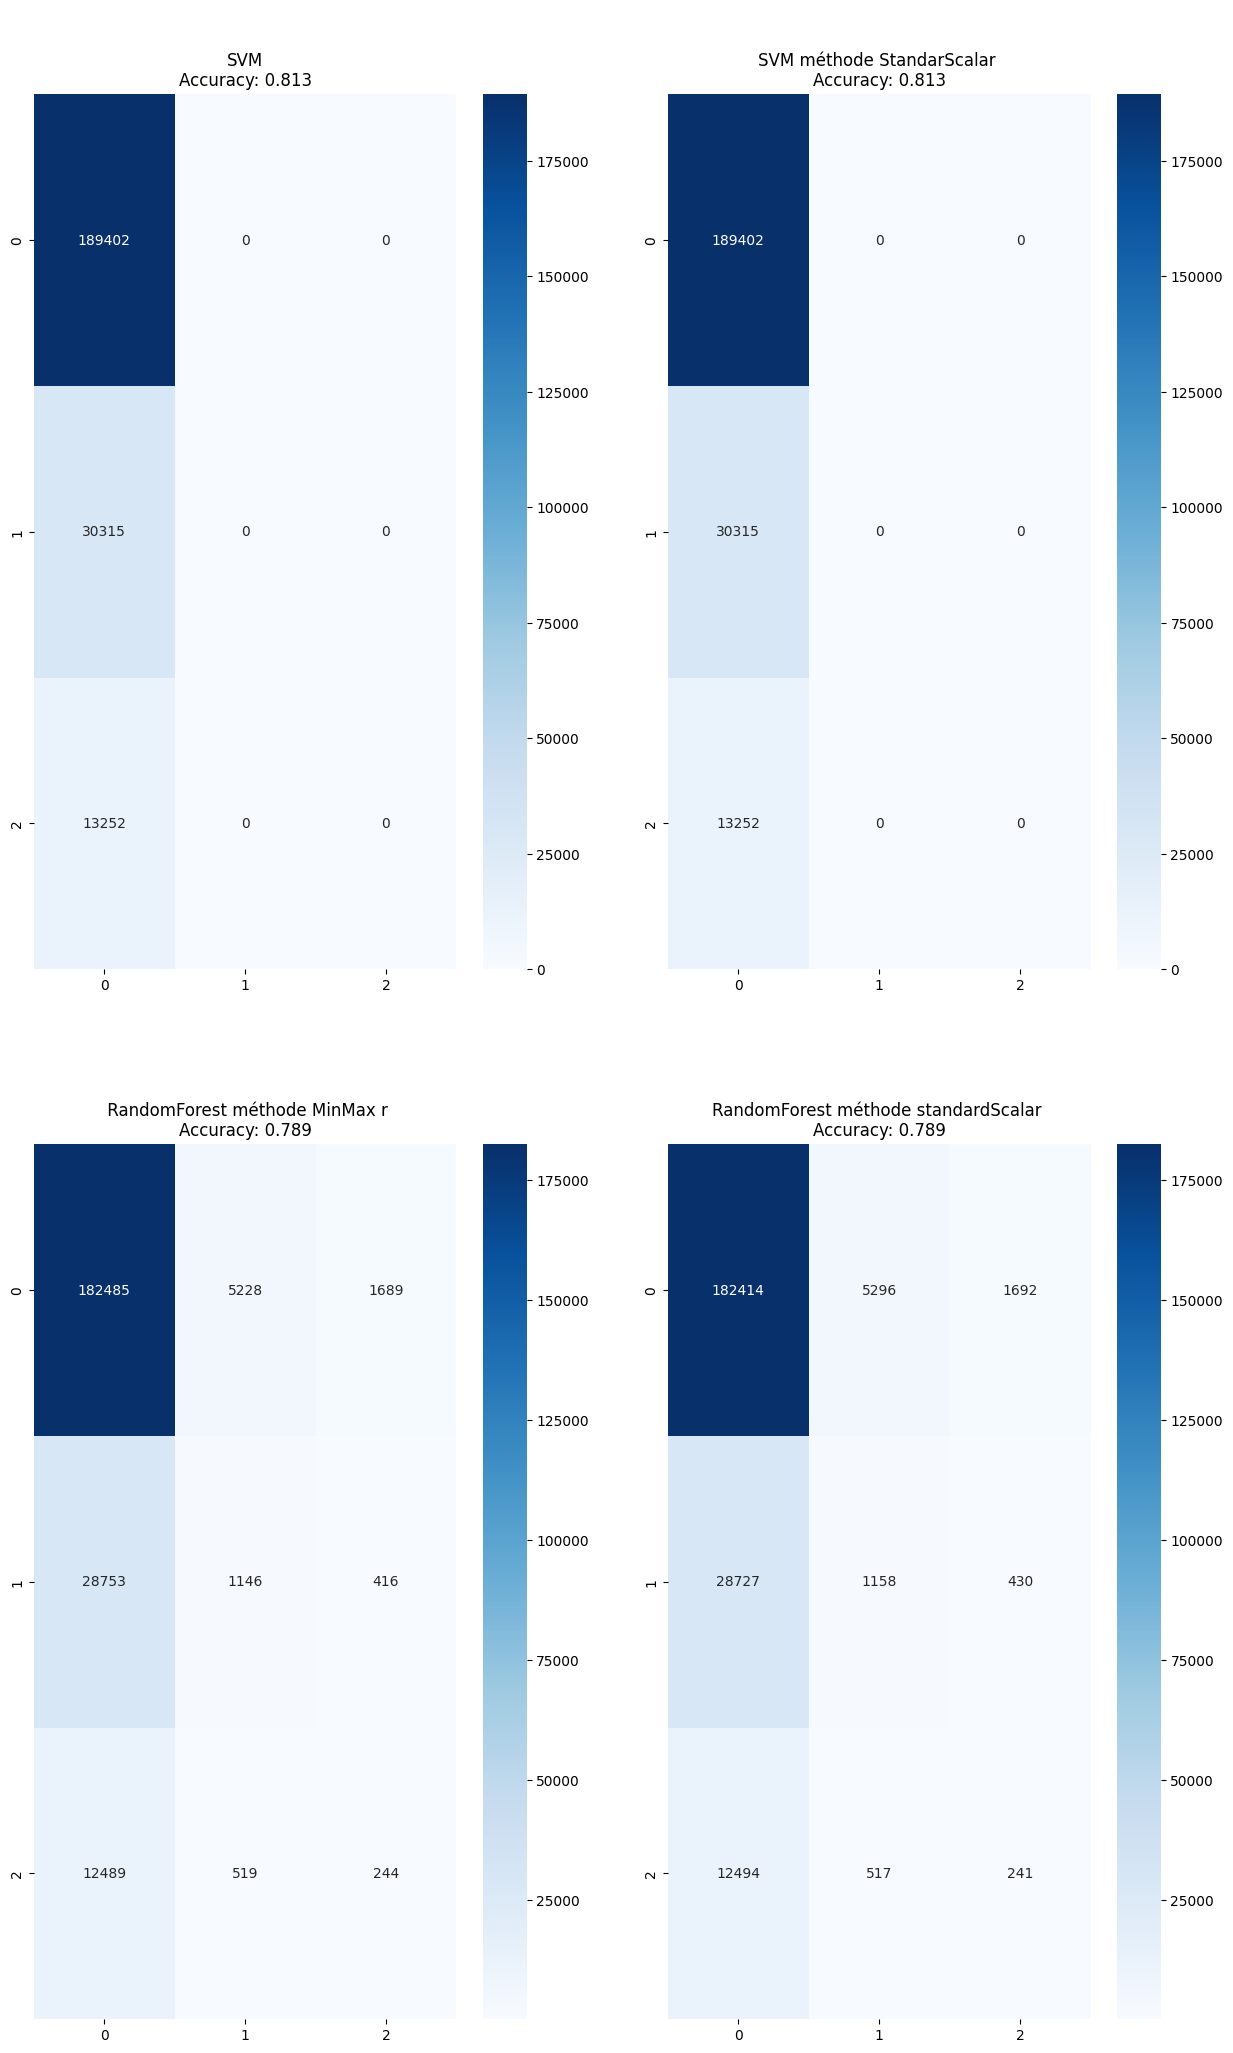

In [93]:
#Afficher les matrices de confusion des modèles

matrix_svm=metrics.confusion_matrix(y_test, y_pred_svm)


matrix_svm1=metrics.confusion_matrix(y_test_op1, y_pred_svm1)


matrix_svm2=metrics.confusion_matrix(y_test_op2, y_pred_svm2)

matrix_rf1 = metrics.confusion_matrix(y_test_op1, y_pred_rf1)
matrix_rf2=metrics.confusion_matrix(y_test_op2, y_pred_rf2)


# Créer la figure avec deux sous-plots côte à côte
fig, ((ax1, ax2),(ax3,ax4)) =plt.subplots(ncols=2, nrows=2, figsize=(15,25))



# Afficher la deuxième matrice de confusion
sns.heatmap(matrix_svm, annot=True, cmap="Blues", fmt="d", ax=ax1)
ax1.set_title(f"SVM\nAccuracy: {lr_model_score_svm:.3f}")


# Afficher la première matrice de confusion


# Afficher la deuxième matrice de confusion
sns.heatmap(matrix_svm1, annot=True, cmap="Blues", fmt="d", ax=ax2)
ax2.set_title(f"\n\nSVM méthode StandarScalar \nAccuracy: {lr_model_score_svm1:.3f}")

# Afficher la première matrice de confusion


# Afficher la deuxième matrice de confusion
sns.heatmap(matrix_rf2, annot=True, cmap="Blues", fmt="d", ax=ax3)
ax3.set_title(f" RandomForest méthode MinMax r\nAccuracy: {lr_model_score_rf2:.3f}")


# Afficher la première matrice de confusion
sns.heatmap(matrix_rf1, annot=True, cmap="Blues", fmt="d", ax=ax4)
ax4.set_title(f"RandomForest méthode standardScalar \nAccuracy: {lr_model_score_rf1:.3f}")

# Afficher la deuxième matrice de confusion
#sns.heatmap(matrix_rf2, annot=True, cmap="Blues", fmt="d", ax=ax5)
#ax5.set_title(f"RandomForest méthode MinMaxScalar\nAccuracy: {lr_model_score_rf2:.3f}")
# Afficher la figure
plt.show()
